In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn import metrics
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

In [3]:
loan=pd.read_csv("Finalprocessed_loans_2007.csv")

In [4]:
loan.T

,0,1,2,3,4,5,6,7,8,9,...,38113,38114,38115,38116,38117,38118,38119,38120,38121,38122
loan_amnt,5000.000,2500.000,2400.000,10000.00,5000.000,7000.000,3000.000,5600.000,5375.000,6500.000,...,5000.000,5000.000,5000.000,5000.000,5000.00,2500.000,8500.000,5000.000,5000.000,7500.000
installment,162.870,59.830,84.330,339.31,156.460,170.080,109.430,152.390,121.450,153.450,...,159.770,161.250,164.230,155.380,158.30,78.420,275.380,156.840,155.380,255.430
grade,2.000,3.000,3.000,3.00,1.000,3.000,5.000,6.000,2.000,3.000,...,2.000,2.000,3.000,1.000,2.00,1.000,3.000,1.000,1.000,5.000
emp_length,10.000,0.000,10.000,10.00,3.000,8.000,9.000,4.000,0.000,5.000,...,2.000,4.000,0.000,1.000,5.00,4.000,3.000,0.000,0.000,0.000
annual_inc,24000.000,30000.000,12252.000,49200.00,36000.000,47004.000,48000.000,40000.000,15000.000,72000.000,...,180000.000,48000.000,80000.000,85000.000,75000.00,110000.000,18000.000,100000.000,200000.000,22000.000
loan_status,1.000,0.000,1.000,1.00,1.000,1.000,1.000,0.000,0.000,1.000,...,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.000
dti,27.650,1.000,8.720,20.00,11.200,23.510,5.350,5.550,18.080,16.120,...,11.930,8.030,1.210,0.310,15.55,11.330,6.400,2.300,3.720,14.290
delinq_2yrs,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.00,0.000,1.000,0.000,0.000,1.000
inq_last_6mths,1.000,5.000,2.000,1.00,3.000,1.000,2.000,2.000,0.000,2.000,...,1.000,1.000,3.000,0.000,0.00,0.000,1.000,0.000,0.000,0.000
open_acc,3.000,3.000,2.000,10.00,9.000,7.000,4.000,11.000,2.000,14.000,...,16.000,6.000,15.000,7.000,10.00,13.000,6.000,11.000,17.000,7.000


In [5]:
loan["loan_status"].value_counts()

1    32717
0     5406
Name: loan_status, dtype: int64

In [6]:
loan['loan_status'].value_counts(normalize=True) * 100

1    85.819584
0    14.180416
Name: loan_status, dtype: float64

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [8]:
from sklearn.model_selection import train_test_split
X=loan.drop("loan_status",1)
y=loan["loan_status"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=11)

In [9]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', BernoulliNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=10)))
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('DT',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB',
  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('RF',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='

In [10]:
seed = 4

from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
from sklearn import model_selection

In [11]:
models2 = []

models2.append(('LR', LogisticRegression()))
models2.append(('DT', DecisionTreeClassifier()))
models2.append(('RF', RandomForestClassifier(n_estimators=10)))
models2.append(('KNN', KNeighborsClassifier()))
models2.append(('NB', BernoulliNB()))
#models2.append(('SVM', ))

def evaluation(modelx):
        
        fit = modelx.fit(X_train,y_train)
    
        y_pred= fit.predict(X_test)
    
        accuracy = accuracy_score(y_test,y_pred)
    
        return accuracy
    
    
results2 = []
names2 = []
for name,model in models2:
    a = evaluation(model)
    results2.append(a)
    names2.append(name)
    print('The accuracy of ',name,' is : ',a) 

results3 = []

for i in results2:
    results3.append([i])

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of  LR  is :  0.8563434467080528
The accuracy of  DT  is :  0.7564046515694676
The accuracy of  RF  is :  0.8359709714085861
The accuracy of  KNN  is :  0.8397306986097753
The accuracy of  NB  is :  0.8413045379032963


### Accuracy, the proportion of correct classifications among all classifications, is very simple and very "intuitive" measure, yet it may be a poor measure for imbalanced data.

# spot checking

In [176]:
def compare_models(n_splits, random_state, X_train, y_train):  

    models  = []
    models.append(('LR', LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    
    
    ### Evaluate model in turn
    

    names       = []
    
    scores_req  =  ['roc_auc', 'balanced_accuracy']
    
    for i in range(len(scores_req)):
        results     =   []
        scoring     =  scores_req[i]
        
        print(scoring)
        
        for name, model in models:
            kfold      =  KFold(n_splits = n_splits,  random_state = random_state)                
            cv_results =  cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
            results.append(cv_results)
            names.append(name)
            msg       = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print(msg)
        
        ### Box plot algorithm comparison
        
        sub_title = 'Algorithm Comparison using ' + scoring
        

        fig, ax = plt.subplots(1, figsize=(8, 6))
        fig.suptitle(sub_title)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.xticks(rotation = 90)
        plt.show()

In [177]:
def split_target_predictor(dataframe, target_name): 

    import pandas as pd
    
    df                 = pd.DataFrame(dataframe)
    predictor_names    = list(df.columns)
    array              = df.values 
    
    #target_name        = input('Target variable name: ')
    
    predictor_names.remove(target_name)
   
    idx                = [df.columns.get_loc(c) for c in df.columns if c in predictor_names]
    X                  = array[:,idx] 

    
    idy                =  df.columns.get_loc(target_name)
    y                  = array[:,idy] 
    return X, y

In [178]:
def split_train_test(X, y, test_size = 0.3, seed = 123): 
    
    from   sklearn.model_selection  import  train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed) 

    return X_train, X_test, y_train, y_test

In [179]:
X_train, X_test, y_train, y_test = split_train_test(X, y, 0.3, 12345)

roc_auc


C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.634506 (0.011117)
KNN: 0.534132 (0.007489)
CART: 0.537039 (0.010169)
NB: 0.645041 (0.017842)


C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

RF: 0.622637 (0.010755)


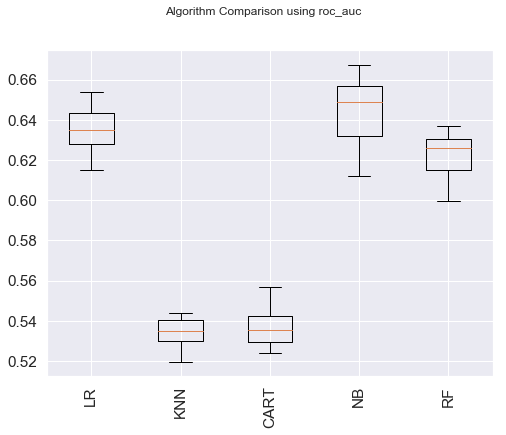

balanced_accuracy


C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.499957 (0.000087)
KNN: 0.503870 (0.005919)
CART: 0.534380 (0.009325)
NB: 0.514502 (0.004177)


C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

RF: 0.523915 (0.007729)


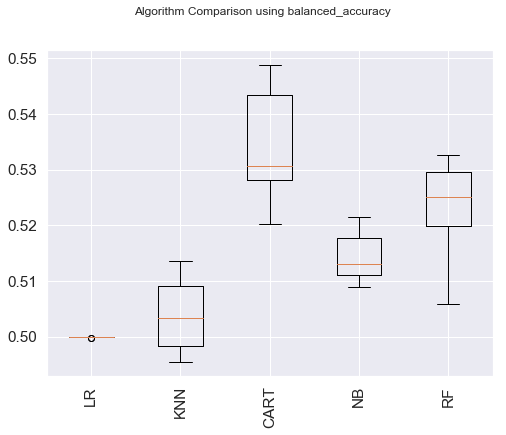

In [180]:


n_splits     = 10
random_state = 123456

compare_models(n_splits, random_state, X_train, y_train)

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
y_pred11=logreg.predict(X_test)

In [14]:
y_prob1 = logreg.predict_proba(X_test)[:,1]

In [15]:
y_prob1

array([0.90328264, 0.84202561, 0.86225056, ..., 0.90296741, 0.86640069,
       0.88703423])

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

acc = accuracy_score(y_test, y_pred11)
prec = precision_score(y_test, y_pred11)
rec = recall_score(y_test, y_pred11)
f1 = f1_score(y_test, y_pred11)
print(acc)
print(prec)
print(rec)
print(f1)


0.8563434467080528
0.8564183280867436
0.9998979070954569
0.922613160001884


Test data accuracy: 0.8563


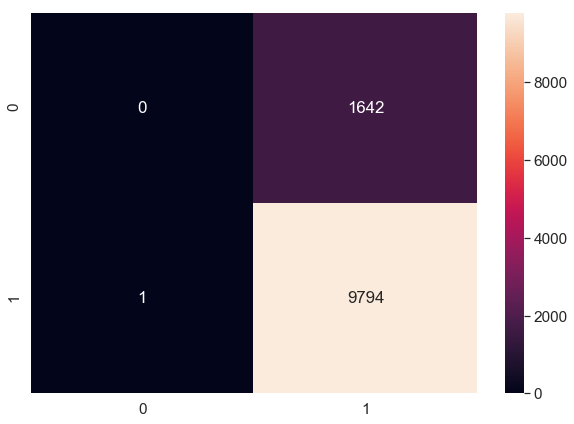

In [17]:
cm11 = confusion_matrix(y_test, y_pred11)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm11, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, y_pred11)))

In [18]:
print(classification_report(y_test, y_pred11))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1642
           1       0.86      1.00      0.92      9795

   micro avg       0.86      0.86      0.86     11437
   macro avg       0.43      0.50      0.46     11437
weighted avg       0.73      0.86      0.79     11437



### Here we can see that 1 has 0.86 precision and  0 has 0.00 which shows that it has not predicted defaulters correctly.

In [19]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred11)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [20]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred11))

0.8563434467080528
0.8563434467080528


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [21]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred11))

0.9998979070954569
0.9998979070954569


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [22]:
print(TN / float(TN + FP))

0.0


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [23]:
print(FP / float(TN + FP))

1.0


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [24]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred11))

0.8564183280867436
0.8564183280867436


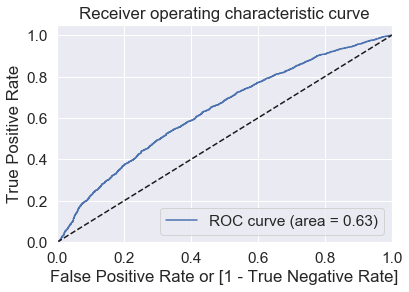

In [25]:

fpr, tpr, thresholds = metrics.roc_curve( y_test, y_prob1,drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_prob1)
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
def get_youdens_j_cutoff(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

In [27]:
print(get_youdens_j_cutoff(fpr,tpr,thresholds))

0.8683021579971302


In [28]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [29]:
evaluate_threshold(0.5)

Sensitivity: 0.9998979070954569
Specificity: 0.0


In [30]:
evaluate_threshold(0.8)

Sensitivity: 0.9328228688106177
Specificity: 0.15651644336175397


In [31]:
evaluate_threshold(0.85)

Sensitivity: 0.7714139867279224
Specificity: 0.39951278928136424


In [32]:
evaluate_threshold(0.86)

Sensitivity: 0.6557427258805513
Specificity: 0.5341047503045067


In [33]:
evaluate_threshold(0.9)

Sensitivity: 0.12322613578356305
Specificity: 0.9482338611449452


In [34]:
evaluate_threshold(0.866)

Sensitivity: 0.564267483409903
Specificity: 0.6272838002436054


### Optimum cut off is 0.863 ,for which the sensitivity is 0.52 and specificity is 0.66.

# Cross Validation

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.8405455  0.83661159 0.84316811 0.83766063 0.8405455  0.84264359
 0.84286464 0.83967463 0.84072422 0.84203621]


In [38]:
print(scores.mean())

0.8406474622279261


In [39]:
print(scores.std())

0.0020824300840459687


### Cross validation score is 0.84 and Standard deviation is 0.002 hence the values are distributed within the range of 84.

In [40]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

[0.764394173589866, 0.6833142904783039, 0.8203182814788681, 0.788946384454453, 0.8406474622279261, 0.8258795706069687, 0.8496973276810467, 0.8432444554833948, 0.8537892963131043, 0.8498284649189214, 0.855363197621738, 0.8527400884007685, 0.8565959535976516, 0.855415567179046, 0.8573828457658429, 0.8568320088701178, 0.8578024559889791, 0.857015591351104, 0.8576450720463891, 0.8574090649582946, 0.8579073602602177, 0.857671304998583, 0.8580122645350668, 0.857854880599698, 0.8580122645386774, 0.8579073602638283, 0.8580909565045566, 0.857959819281124, 0.858038497487261, 0.8580647235559733]


In [41]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.8580909565045566


Text(0, 0.5, 'Cross-validated accuracy')

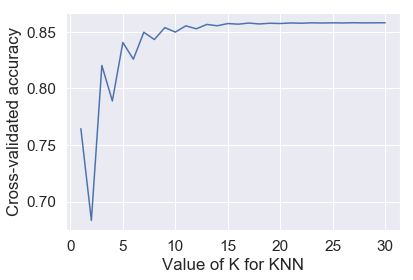

In [42]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

#### we chose the knn value as 10

### comparing the best knn model

In [43]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=10)

# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.8498284649189214


In [44]:
knn_predict=knn.predict()

TypeError: predict() missing 1 required positional argument: 'X'

### After applying the optimum knn value score increases from 0.84 0.849

In [45]:
cross_val_score(knn, X, y, cv=10, scoring='roc_auc').mean()

0.5407992214039853

### Area under the curve for cross validation is 0.54

### We can't come to conclusion with accuracy rate ,our model performed poor while seeing the values of precision and f1 score. So we need to balance this imbalanced dataset

# SMOTE

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
#X=model.drop("loan_status",1)
#y=model["loan_status"]

In [14]:
# Implementing Oversampling for Handling Imbalanced 
ros = SMOTE()
X_res,y_res=ros.fit_sample(X_train,y_train)

In [15]:
X_res.shape,y_res.shape

((45844, 38), (45844,))

In [16]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({1: 32717, 0: 5406})
Resampled dataset shape Counter({0: 22922, 1: 22922})


In [17]:
#from sklearn.model_selection import train_test_split

In [18]:
#X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=.30,random_state=11)

In [19]:
X_train=X_res
y_train=y_res

In [20]:
X_train.shape

(45844, 38)

In [21]:
X_test.shape

(11437, 38)

In [22]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
y_pred=logreg.predict(X_test)

In [24]:
y_prob12 = logreg.predict_proba(X_test)[:,1]

In [25]:
y_prob12

#2 because probability of predicting as 0 and 1

array([0.72041587, 0.6651714 , 0.73912983, ..., 0.40526729, 0.34279151,
       0.63785537])

In [26]:
y_prob12.shape

(11437,)

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


Test data accuracy: 0.6576


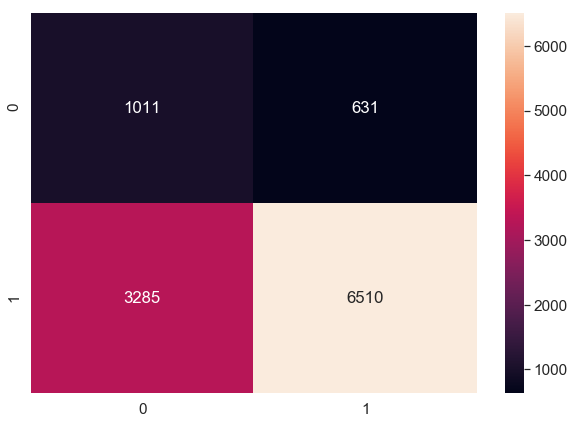

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, y_pred)))

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.62      0.34      1642
           1       0.91      0.66      0.77      9795

   micro avg       0.66      0.66      0.66     11437
   macro avg       0.57      0.64      0.55     11437
weighted avg       0.81      0.66      0.71     11437



### This model predicted 1 with 0.65 precision and 0 with 0.65 precision which shows the precision rate improved after over sampling.

In [30]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.657603,0.911637,0.664625,0.768777


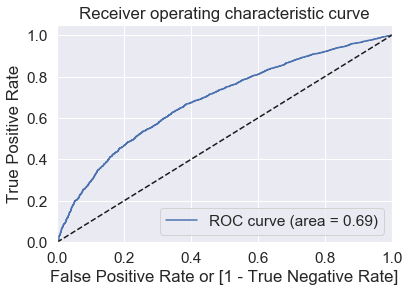

In [31]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_prob12,drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_prob12)
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
dtree1 = DecisionTreeClassifier()

In [34]:
dtree1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
predictions1 = dtree1.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.21      0.24      0.22      1642
           1       0.87      0.85      0.86      9795

   micro avg       0.77      0.77      0.77     11437
   macro avg       0.54      0.55      0.54     11437
weighted avg       0.78      0.77      0.77     11437



Test data accuracy: 0.7653


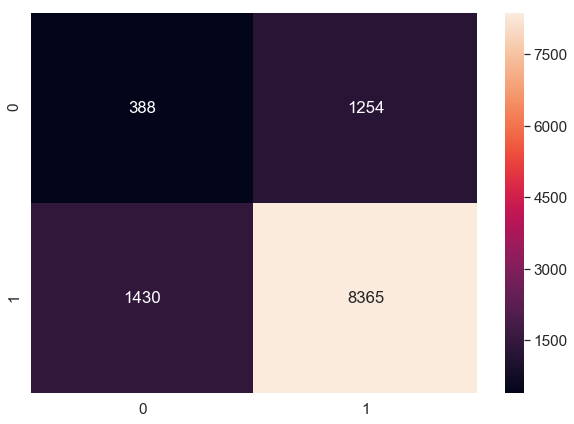

In [38]:
cm = confusion_matrix(y_test, predictions1)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, predictions1)))

In [39]:
# Predicting Test Set
acc = accuracy_score(y_test, predictions1)
prec = precision_score(y_test, predictions1)
rec = recall_score(y_test, predictions1)
f1 = f1_score(y_test, predictions1)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [40]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.657603,0.911637,0.664625,0.768777
1,Decision Tree,0.765323,0.869633,0.854007,0.861749


In [41]:
y_prob16 = dtree1.predict_proba(X_test)[:,1]

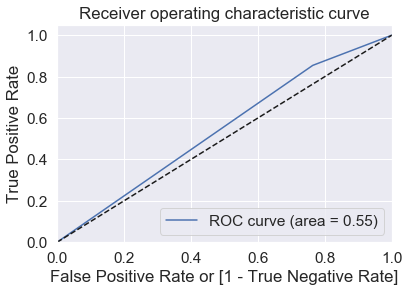

In [42]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_prob16,drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_prob16)
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

## Randomforest After oversampling

In [43]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 11,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

#

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=11, verbose=0, warm_start=False)

In [44]:
# Predicting Test Set
y_pred2 = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2)
rec = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

Test data accuracy: 0.8300


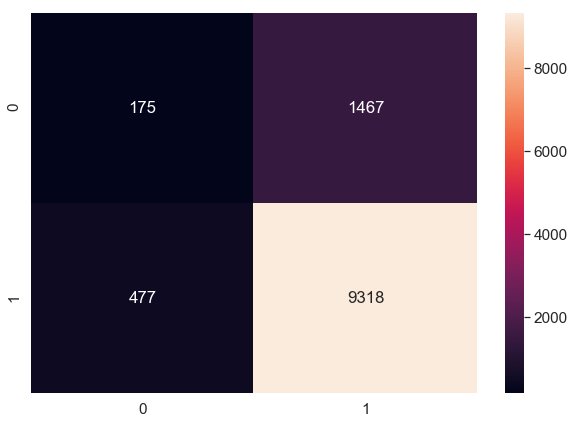

In [45]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, y_pred2)))

In [46]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.27      0.11      0.15      1642
           1       0.86      0.95      0.91      9795

   micro avg       0.83      0.83      0.83     11437
   macro avg       0.57      0.53      0.53     11437
weighted avg       0.78      0.83      0.80     11437



### The random forest model predicted 1 with 0.87 precision and 0 with 0.95 precision  which shows the overall precision rate is 99.1 which shows great improvement in the model.

In [47]:
y_prob13 = classifier.predict_proba(X_test)[:,1]

In [48]:
y_prob13

array([1. , 1. , 0.8, ..., 0.7, 0.8, 1. ])

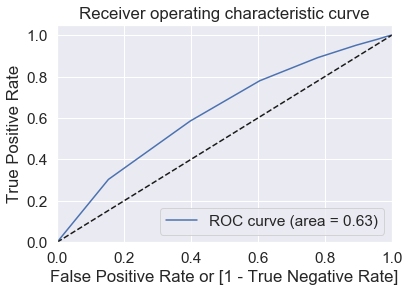

In [49]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_prob13,drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_prob13)
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

## Naive bayes

In [50]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
# Predicting Test Set
y_pred4 = model.predict(X_test)
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

In [52]:
model_results = pd.DataFrame([['Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

Test data accuracy: 0.4310


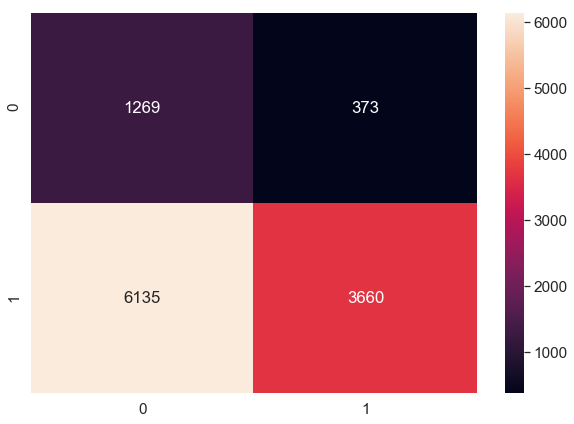

In [53]:
cm = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, y_pred4)))

In [54]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.17      0.77      0.28      1642
           1       0.91      0.37      0.53      9795

   micro avg       0.43      0.43      0.43     11437
   macro avg       0.54      0.57      0.40     11437
weighted avg       0.80      0.43      0.49     11437



In [55]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.657603,0.911637,0.664625,0.768777
1,Decision Tree,0.765323,0.869633,0.854007,0.861749
2,Random Forest,0.830025,0.863978,0.951302,0.905539
3,Naive Bayes,0.430970,0.907513,0.373660,0.529361


### This model predicted 1 with 0.72 precision and 0 with 0.57 precision which shows the overall precision rate is 0.64.

In [56]:
y_prob14 = model.predict_proba(X_test)[:,1]

In [57]:
y_prob14

array([0.5271787 , 0.35841292, 0.67226371, ..., 0.63672379, 0.18238141,
       0.92495798])

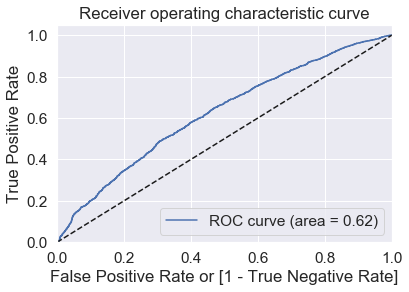

In [58]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_prob14,drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_prob14)
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

# Bagging

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

In [60]:
# Bagging

bg = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5, max_features=1.0, n_estimators=20)
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [61]:
bg.score(X_train, y_train)

0.9755475089433732

In [62]:
bg.score(X_test,y_test)

0.8389437789630148

In [63]:
bg_pred = bg.predict(X_test)

Test data accuracy: 0.8389


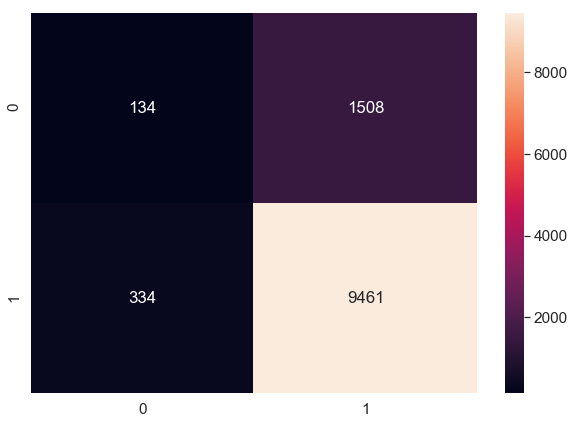

In [64]:
cm6 = confusion_matrix(y_test, bg_pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm6, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, bg_pred)))

In [65]:
print(classification_report(y_test,bg_pred))

              precision    recall  f1-score   support

           0       0.29      0.08      0.13      1642
           1       0.86      0.97      0.91      9795

   micro avg       0.84      0.84      0.84     11437
   macro avg       0.57      0.52      0.52     11437
weighted avg       0.78      0.84      0.80     11437



In [66]:
# Predicting Test Set

acc = accuracy_score(y_test, bg_pred)
prec = precision_score(y_test, bg_pred)
rec = recall_score(y_test, bg_pred)
f1 = f1_score(y_test, bg_pred)
model_results = pd.DataFrame([['Bagging Classifier', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.657603,0.911637,0.664625,0.768777
1,Decision Tree,0.765323,0.869633,0.854007,0.861749
2,Random Forest,0.830025,0.863978,0.951302,0.905539
3,Naive Bayes,0.430970,0.907513,0.373660,0.529361
4,Bagging Classifier,0.838944,0.862522,0.965901,0.911289


# Boosting

In [67]:
#Boosting
ad = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=0.01)
ad.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=10, random_state=None)

In [68]:
ad.score(X_train, y_train)

1.0

In [69]:
ad.score(X_test,y_test)

0.7640115414881525

In [70]:
ad_pred = ad.predict(X_test)

In [71]:
print(classification_report(y_test,ad_pred))

              precision    recall  f1-score   support

           0       0.21      0.23      0.22      1642
           1       0.87      0.85      0.86      9795

   micro avg       0.76      0.76      0.76     11437
   macro avg       0.54      0.54      0.54     11437
weighted avg       0.77      0.76      0.77     11437



Test data accuracy: 0.7640


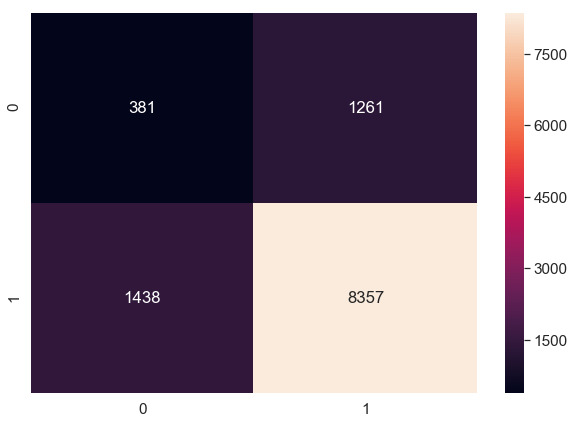

In [72]:
cm7 = confusion_matrix(y_test, ad_pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm7, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, ad_pred)))

In [73]:
acc = accuracy_score(y_test, ad_pred)
prec = precision_score(y_test, ad_pred)
rec = recall_score(y_test, ad_pred)
f1 = f1_score(y_test, ad_pred)


In [74]:
model_results = pd.DataFrame([['Adaboost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.657603,0.911637,0.664625,0.768777
1,Decision Tree,0.765323,0.869633,0.854007,0.861749
2,Random Forest,0.830025,0.863978,0.951302,0.905539
3,Naive Bayes,0.430970,0.907513,0.373660,0.529361
4,Bagging Classifier,0.838944,0.862522,0.965901,0.911289
5,Adaboost,0.764012,0.868892,0.853190,0.860969


<b>Is boosting more vulnerable to overfitting than bagging?</b>
<p style="padding:5px">We need to understand that bagging decreases variance, while boosting decreases bias.

Also, to be noted that under-fitting means that the model has low variance and high bias and vice versa for overfitting.

So, boosting is more vulnerable to overfitting than bagging.</p>

# Variable importance plot

##### Variable importance plot for random forest

Text(0.5, 0, 'Relative Importance')

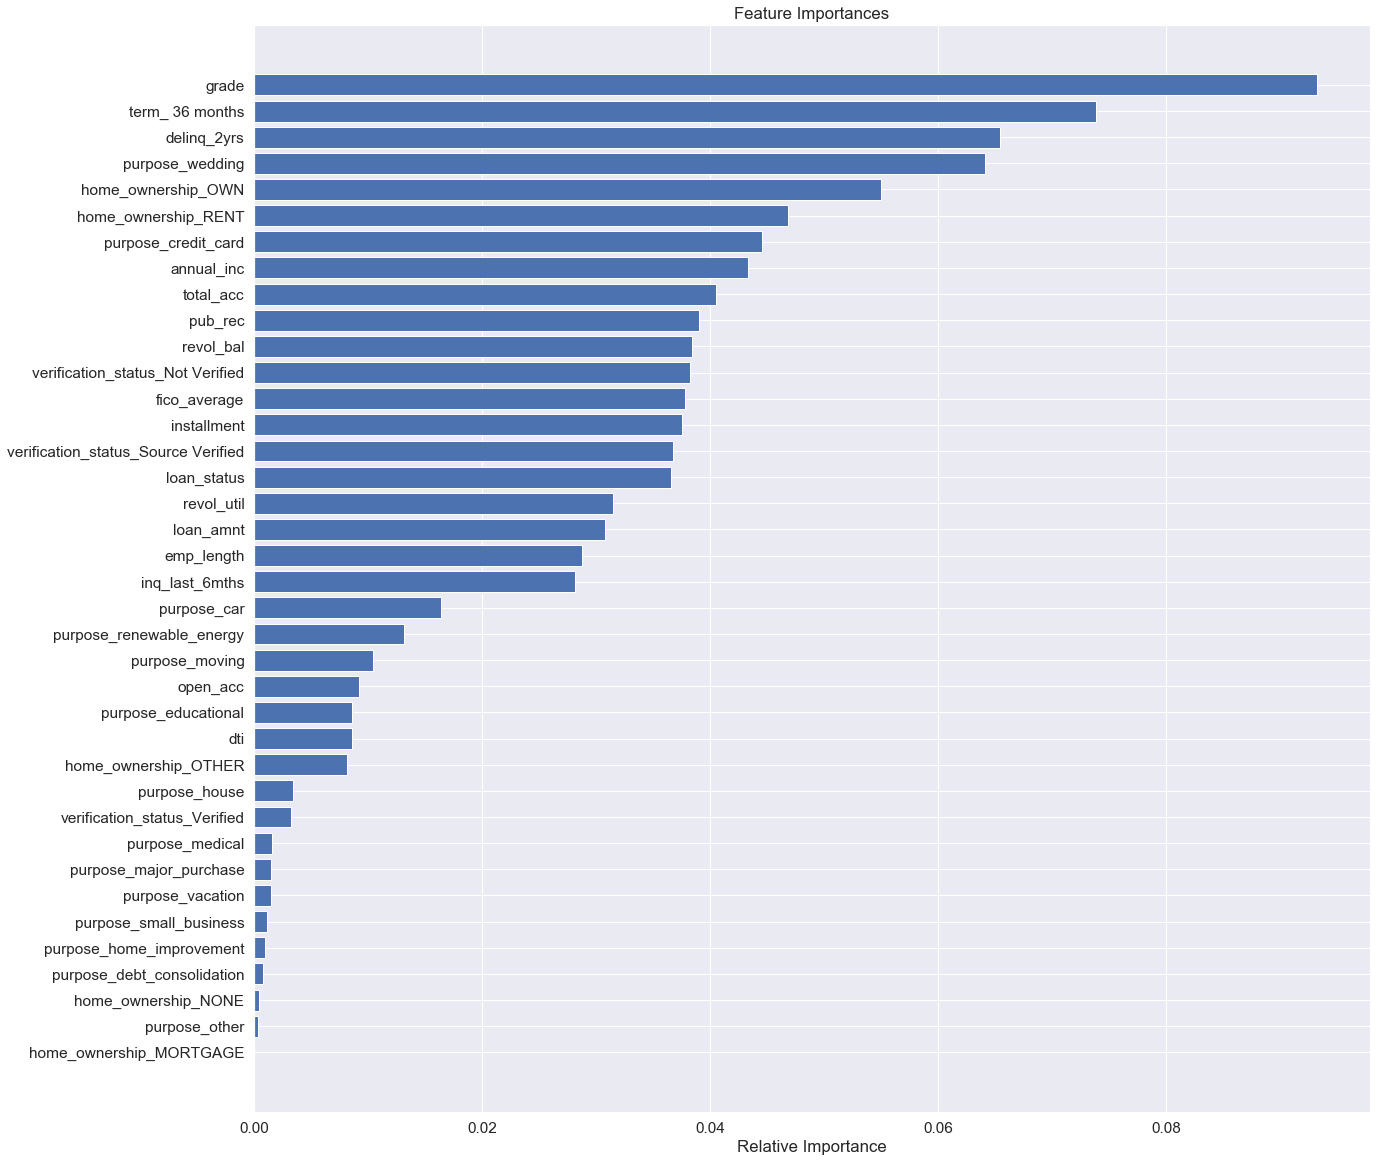

In [75]:
features=loan.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [76]:
varImp_df   = pd.DataFrame({'Feature_names' :features[indices],\
                            'Importances' : importances[indices]})
varImp_df.sort_values('Importances', ascending = False) 

,Feature_names,Importances
37,grade,0.093212
36,term_ 36 months,0.073805
35,delinq_2yrs,0.065426
34,purpose_wedding,0.064070
33,home_ownership_OWN,0.054950
32,home_ownership_RENT,0.046810
31,purpose_credit_card,0.044516
30,annual_inc,0.043325
29,total_acc,0.040509
28,pub_rec,0.039035


##### variable importance for decision tree model

Text(0.5, 0, 'Relative Importance')

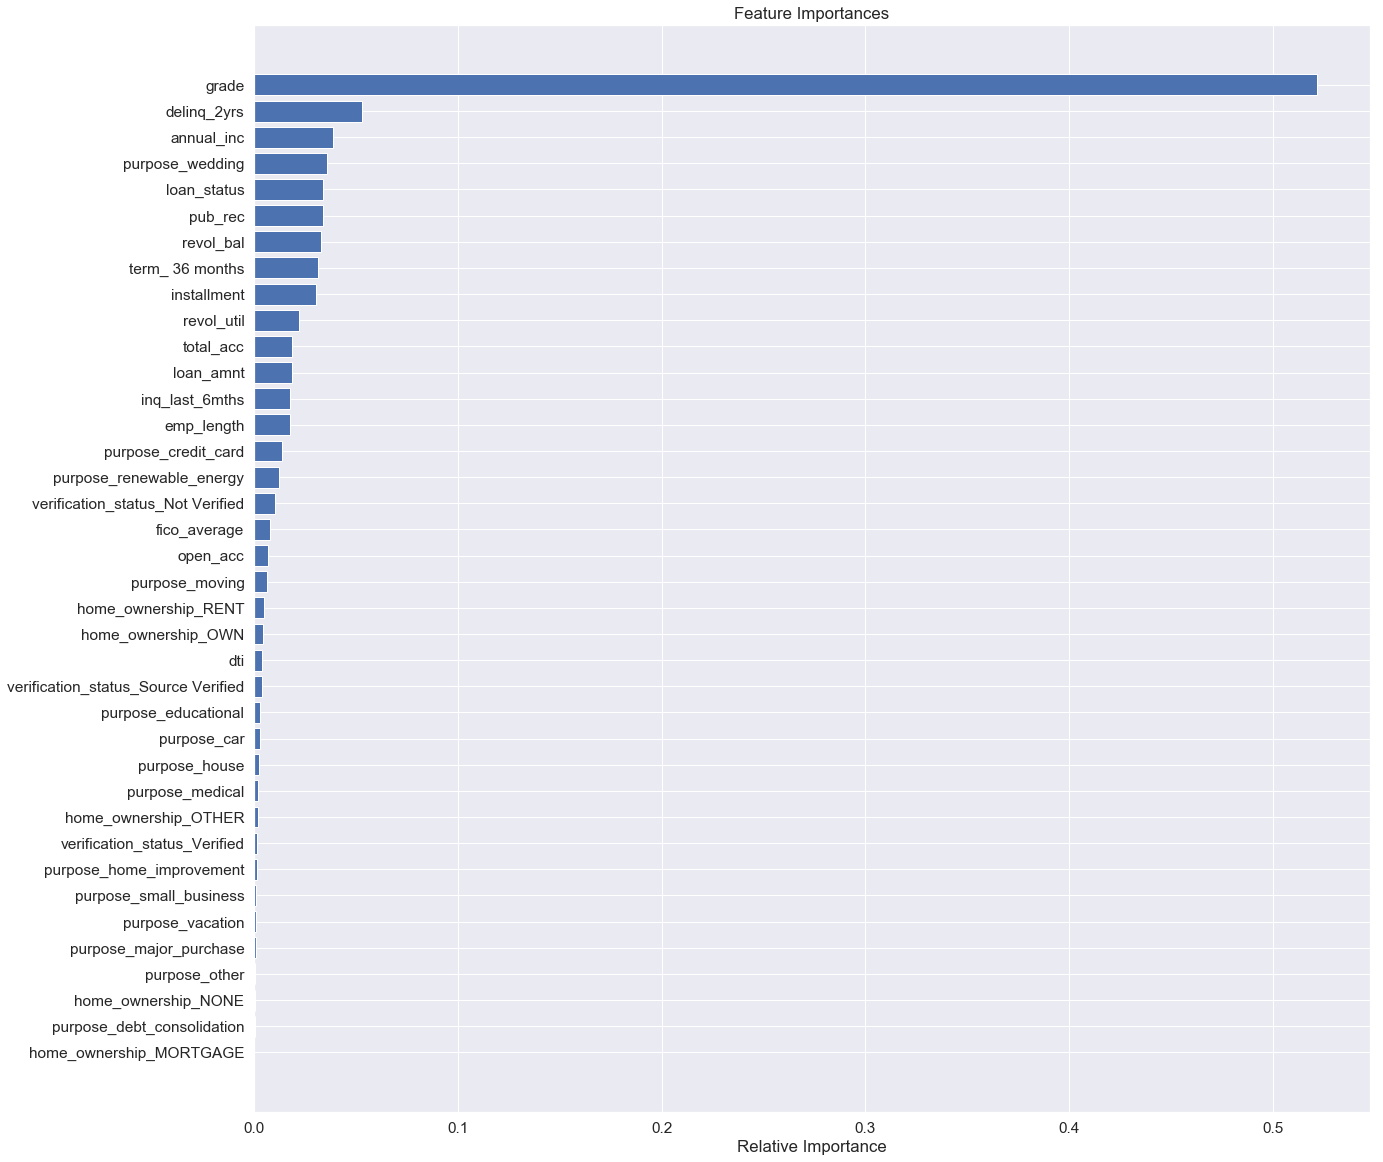

In [77]:
features=loan.columns
importances = dtree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [78]:
varImp_df1   = pd.DataFrame({'Feature_names' :features[indices],\
                            'Importances' : importances[indices]})
varImp_df1.sort_values('Importances', ascending = False) 

,Feature_names,Importances
37,grade,0.521411
36,delinq_2yrs,0.052885
35,annual_inc,0.038650
34,purpose_wedding,0.035958
33,loan_status,0.033899
32,pub_rec,0.033735
31,revol_bal,0.032826
30,term_ 36 months,0.031512
29,installment,0.030445
28,revol_util,0.022209


### Hyper parameter tuning

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [80]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 10

# Instantiate the grid search model
classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarn

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [81]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.650271,0.038563,0.008651,0.006232,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.558875,...,0.829544,0.831677,0.836234,0.842390,0.843286,0.847407,0.849443,0.846292,0.847805,0.016278
1,0.639228,0.024638,0.006688,0.006552,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.551025,...,0.848570,0.831289,0.838173,0.830175,0.838003,0.838463,0.846316,0.840960,0.845244,0.013628
2,0.623910,0.018798,0.006288,0.006581,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.558875,...,0.826612,0.862215,0.845444,0.850364,0.850000,0.840936,0.824164,0.836258,0.848186,0.017848
3,0.633794,0.027632,0.007488,0.006163,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.549717,...,0.832865,0.840863,0.833010,0.827727,0.831338,0.844474,0.835967,0.829787,0.844102,0.019893
4,0.894465,0.034932,0.009051,0.006554,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.521805,...,0.888415,0.889506,0.888342,0.883931,0.883689,0.883398,0.887882,0.888342,0.894658,0.016568
5,0.899666,0.027756,0.005525,0.006124,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.519843,...,0.889118,0.887857,0.888197,0.884731,0.882210,0.885022,0.887736,0.887494,0.894992,0.017447
6,0.847285,0.035287,0.007088,0.006497,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.516572,...,0.878260,0.881241,0.880538,0.880465,0.881847,0.881847,0.884392,0.883665,0.888383,0.014018
7,0.864005,0.025797,0.011013,0.006000,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.525512,...,0.876854,0.880659,0.880877,0.878769,0.872564,0.878914,0.879060,0.877048,0.886003,0.016160
8,0.467497,0.016369,0.004362,0.005117,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.569123,...,0.850654,0.844062,0.829205,0.845128,0.841202,0.835507,0.824164,0.835361,0.848581,0.022243
9,0.475562,0.019581,0.008288,0.005636,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.569778,...,0.853345,0.832453,0.835191,0.832525,0.831411,0.829326,0.820819,0.862021,0.846203,0.021412


In [82]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8880769566355466
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [83]:
# model with optimal hyperparameters
clf_gini = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf_gini.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
# accuracy score
clf_gini.score(X_test,y_test)

0.8362332779575063

In [85]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(loan.columns[1:])
features

['installment',
 'grade',
 'emp_length',
 'annual_inc',
 'loan_status',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'fico_average',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Not Verified',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'term_ 36 months',
 'term_ 60 months']